In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:

config_file= r'C:\Users\adity\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = r'C:\Users\adity\Downloads\frozen_inference_graph.pb'


In [3]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
print(f"Frozen model path: {frozen_model}")
print(f"Config file path: {config_file}")


Frozen model path: C:\Users\adity\Downloads\frozen_inference_graph.pb
Config file path: C:\Users\adity\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt


In [5]:
file_name = r'C:\Users\adity\Downloads\labels.txt'

classLabels = []
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

print(classLabels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
import cv2
import os


config_file = r'C:\Users\adity\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

frozen_model = r'C:\Users\adity\Downloads\frozen_inference_graph.pb'

# Debugging: Check file existence
if not os.path.exists(frozen_model):
    print(f"Error: Frozen model file not found at {frozen_model}")
if not os.path.exists(config_file):
    print(f"Error: Config file not found at {config_file}")

# Initialize the model if files exist
if os.path.exists(frozen_model) and os.path.exists(config_file):
    try:
        model = cv2.dnn_DetectionModel(frozen_model, config_file)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")
        


Model loaded successfully.


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 00000246793D4F50>

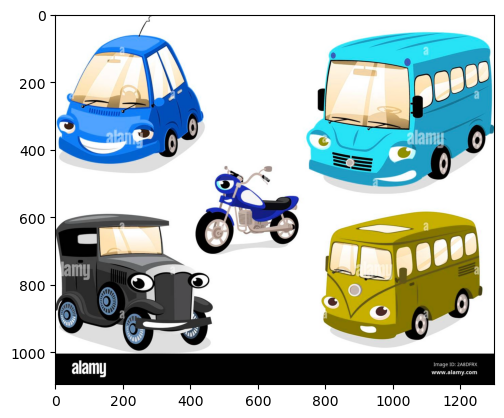

In [9]:
img= cv2.imread(r'C:\Users\adity\Downloads\boy.jpg')
plt.imshow(img)

In [10]:
ClassIndex, Confidence, bbox = model.detect(img, confThreshold=0.5)


In [11]:
print(ClassIndex)

[6 3 3 4 6]


In [12]:
font_scale=10
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(), Confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale= font_scale,color=(0,255,0),thickness=5)

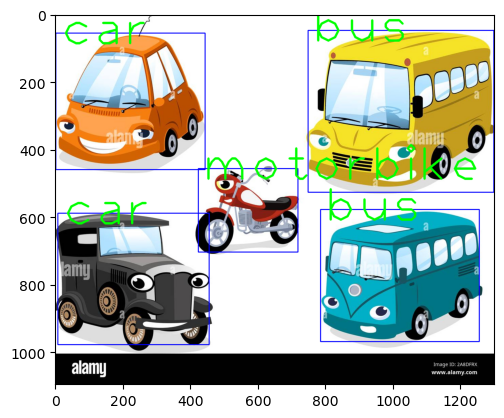

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [3]:

import cv2

# Create a VideoCapture object
video_path = r'C:\Users\adity\Downloads\street2.mp4'
cap = cv2.VideoCapture(video_path)

# Fallback to the webcam if the video cannot be opened
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open the video source')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        print("No frame retrieved. Exiting...")
        break

    # Object detection
    ClassIndex, Confidence, bbox = model.detect(frame, confThreshold=0.55)

    # Draw bounding boxes and labels
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), Confidence.flatten(), bbox):
            if ClassInd <= 80:  # Assuming COCO dataset with 80 classes
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1],
                            (boxes[0] + 10, boxes[1] + 40),
                            font, font_scale, color=(0, 255, 0), thickness=5)

    # Display the frame
    cv2.imshow('Object Detection by Adityabodhhi', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

NameError: name 'model' is not defined